In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import graphviz 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import category_encoders as ce

import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv("../../Datasets/car_evaluation.csv", header=None)
df.columns = ["buyingPrice", "maintCost", "doors", "persons", "lugBoot", "safety", "decision"]
print(df.shape)
display(df.head())

(1728, 7)


,buyingPrice,maintCost,doors,persons,lugBoot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyingPrice  1728 non-null   object
 1   maintCost    1728 non-null   object
 2   doors        1728 non-null   object
 3   persons      1728 non-null   object
 4   lugBoot      1728 non-null   object
 5   safety       1728 non-null   object
 6   decision     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [40]:
for col_name in df.columns:
    print(df[col_name].value_counts(), "\n")

buyingPrice
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64 

maintCost
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64 

doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64 

persons
2       576
4       576
more    576
Name: count, dtype: int64 

lugBoot
small    576
med      576
big      576
Name: count, dtype: int64 

safety
low     576
med     576
high    576
Name: count, dtype: int64 

decision
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64 



In [41]:
# train test split
X = df.drop(['decision'], axis=1)
y = df['decision']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train.shape, X_test.shape

((1382, 6), (346, 6))

In [42]:
# encoding
X_encoder = ce.OrdinalEncoder(cols=list(X.columns))

X_train_encoded = X_encoder.fit_transform(X_train)
X_test_encoded = X_encoder.transform(X_test)

X_train_encoded.head()

,buyingPrice,maintCost,doors,persons,lugBoot,safety
107,1,1,1,1,1,1
901,2,1,2,2,2,2
1709,3,2,1,3,1,1
706,4,3,3,3,3,2
678,4,3,2,3,3,3


In [50]:
# classifier
params = {
    "criterion": ["entropy", "gini"],
    "max_depth": [5, 10, 15, 18, 19, 20],
    "min_samples_split": [1, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5]
}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, cv=10, verbose=1, n_jobs=-1)
grid.fit(X_train_encoded, y_train)
clf = grid.best_estimator_
clf

Fitting 10 folds for each of 540 candidates, totalling 5400 fits


DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=3,
                       random_state=42)

In [51]:
# prediction
y_pred_train = clf.predict(X_train_encoded)
y_pred_test = clf.predict(X_test_encoded)
print('Train Accuracy: {0:0.5f}'. format(accuracy_score(y_train, y_pred_train)))
print('Test Accuracy: {0:0.5f}'. format(accuracy_score(y_test, y_pred_test)))

Train Accuracy: 0.99493
Test Accuracy: 0.96243


In [52]:
# confusion matrix and classification report
display(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

array([[ 75,   7,   1,   0],
       [  1,  10,   0,   0],
       [  1,   0, 234,   0],
       [  3,   0,   0,  14]])

              precision    recall  f1-score   support

         acc       0.94      0.90      0.92        83
        good       0.59      0.91      0.71        11
       unacc       1.00      1.00      1.00       235
       vgood       1.00      0.82      0.90        17

    accuracy                           0.96       346
   macro avg       0.88      0.91      0.88       346
weighted avg       0.97      0.96      0.96       346



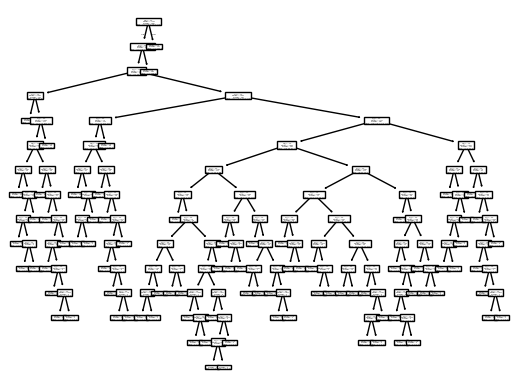

In [53]:
# visualising trees - sklearn
tree.plot_tree(clf.fit(X_train_encoded, y_train))
plt.show()

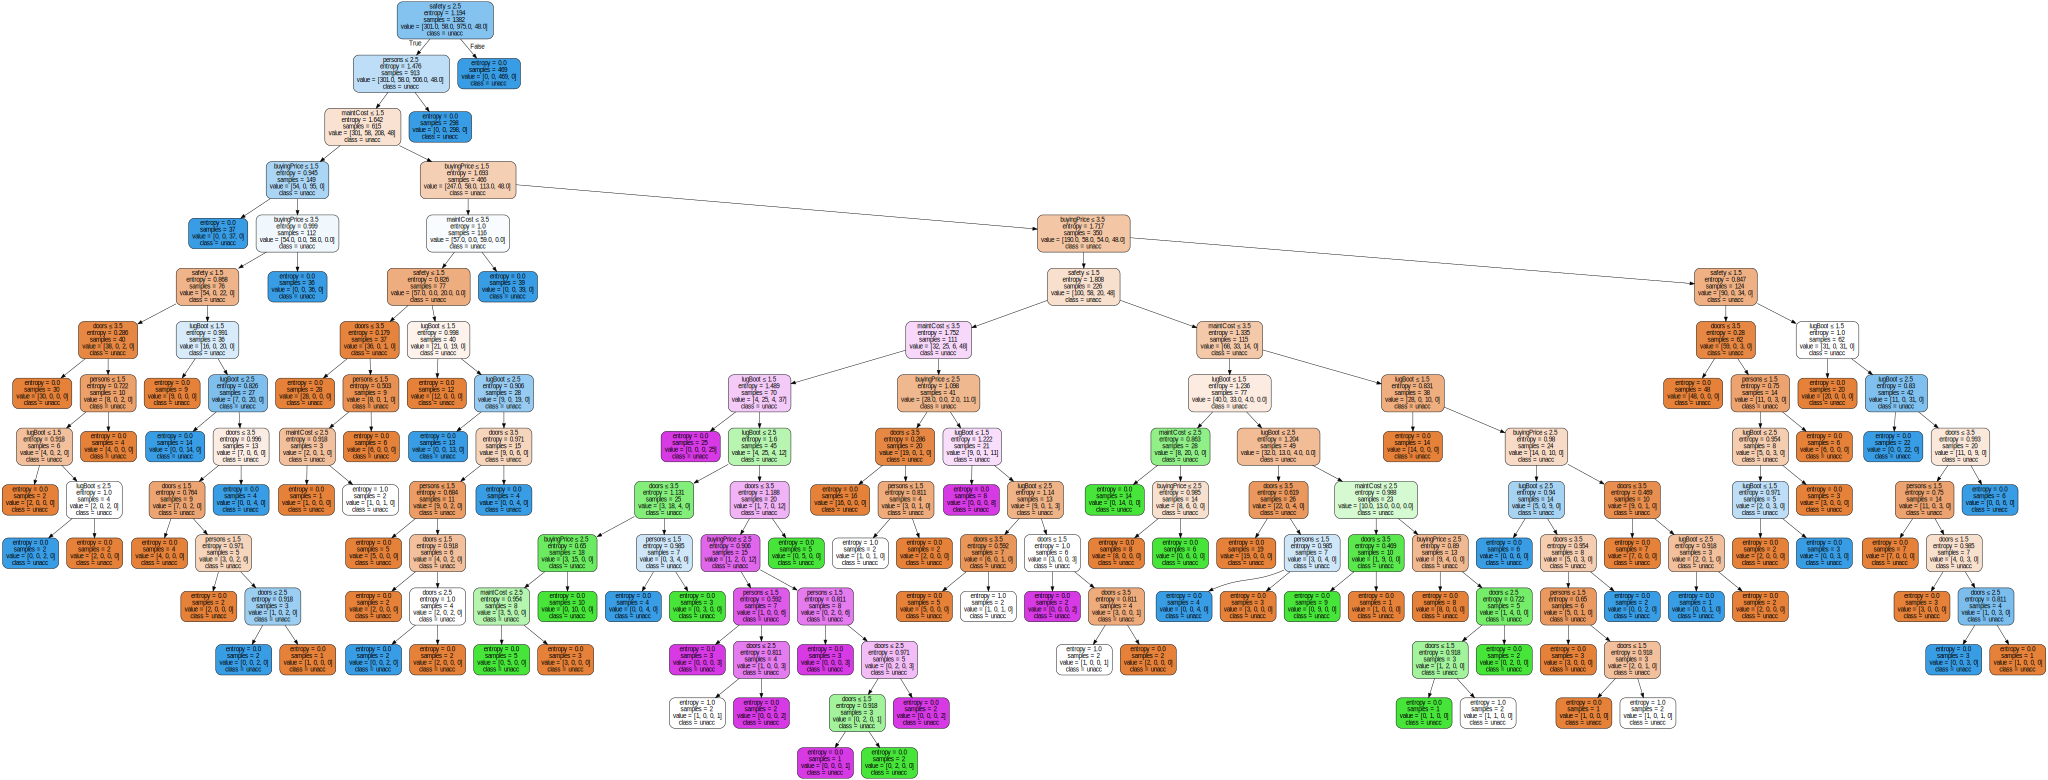

In [54]:
# visualising trees - graphviz
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=X_train_encoded.columns,  
    class_names=y_train,  
    filled=True, rounded=True,  
    special_characters=True
)
graph = graphviz.Source(dot_data) 
graph 